In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import functools as ft
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from PIL import Image
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from pylab import rcParams
import matplotlib.pyplot as plt
from google.colab import drive


In [2]:
def plot_confusion(prediction, target):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    list_labels_cat = ['ARTEFACTS', 'BLASTES', 'ERYTHROBLASTES', 'LYMPHOCYTES', 'MONOCYTES', 'MYELOCYTES', 'NEUTROPHILES']
    # init figure size
    # targ_valids_cat = [list_labels_cat[i] for i in target]
    # preds_valids_cat = [list_labels_cat[i] for i in prediction]
    rcParams['figure.figsize'] = 7, 7
    df = pd.DataFrame(confusion_matrix(target, prediction, labels = list_labels_cat, normalize = 'true'), index = list_labels_cat, columns= list_labels_cat)
    # df = pd.DataFrame(confusion_matrix(targ_valids_cat, preds_valids_cat, labels = list_labels_cat, normalize = 'true'))

    fig = plt.figure()
    sns.heatmap(df, annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')



# Import features

In [3]:
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [4]:
features_table = pd.read_csv('/content/drive/MyDrive/TP_ML/features_table_renamed_features.csv')
len(features_table.columns)

41

In [5]:
features_table.head()

,cytoID,Hematoxylin_Mean_nuclei,Hematoxylin_Std_dev_nuclei,Hematoxylin_Min_nuclei,Hematoxylin_Max_nuclei,Hematoxylin_Median_nuclei,Eosin_Mean_nuclei,Eosin_Std_dev_nuclei,Eosin_Min_nuclei,Eosin_Max_nuclei,...,Eosin_Min_cytoonly,Eosin_Max_cytoonly,Hue_Mean_cytoonly,Saturation_Mean_cytoonly,Saturation_Std_dev_cytoonly,Saturation_Min_cytoonly,Saturation_Max_cytoonly,Saturation_Median_cytoonly,Eosin_Median_cytoonly,Area_µm^2_cytoonly
0,323,0.2729,0.0587,0.0812,0.5868,0.2695,0.1093,0.0362,-0.0309,0.3430,...,-0.0963,1.5011,0.2808,0.1940,0.1360,0.0000,1.0000,0.1935,0.0645,403.2738
1,606,0.4392,0.1176,0.1331,1.1069,0.4345,0.1203,0.0760,-0.1783,0.5885,...,-0.0905,0.5774,0.3424,0.2094,0.0687,0.0000,0.7907,0.2245,0.1465,333.8690
2,1798,0.3907,0.1056,0.0665,0.8533,0.3905,0.1693,0.0706,-0.0368,1.4945,...,-0.0454,0.4833,0.2674,0.4240,0.1089,0.0129,0.7961,0.4395,0.1315,49.5532
3,1758,0.2780,0.0572,0.0784,0.5487,0.2775,0.1017,0.0418,-0.0569,0.3462,...,-0.0984,0.2180,0.2817,0.1261,0.0977,0.0000,0.5392,0.1015,0.0245,265.4986
4,486,0.6488,0.1758,0.1511,0.9301,0.6865,0.0173,0.0377,-0.0790,0.1103,...,0.0061,0.2066,0.4115,0.1851,0.0422,0.0000,0.4603,0.1925,0.1495,361.0130


# Find null values

1) List the number of null values for each column. Which column has null values? 


2) Delete the rows where there are null values


# Add labels

In [6]:
labels = pd.read_csv('/content/drive/MyDrive/TP_ML/labels.csv')
labels

,cytoID,label
0,1518,MONOCYTES
1,1801,NEUTROPHILES
2,628,ERYTHROBLASTES
3,468,ERYTHROBLASTES
4,1888,ERYTHROBLASTES
...,...,...
2012,1438,LYMPHOCYTES
2013,1706,ERYTHROBLASTES
2014,1468,NEUTROPHILES
2015,1726,ERYTHROBLASTES


3) We want to remove the labels of the cells deleted in the previous question. To do so, create a new dataframe "*dataset*" generated by the joint of *features_table* and *labels* on **cytoID** number.

# Visualise the distribution of the class



4) Count the number of cells per class. What can we say about the distribution of the classes? 

5) Plot the distribution of the classes using sns.countplot() and the dataframe.

*Expected result*


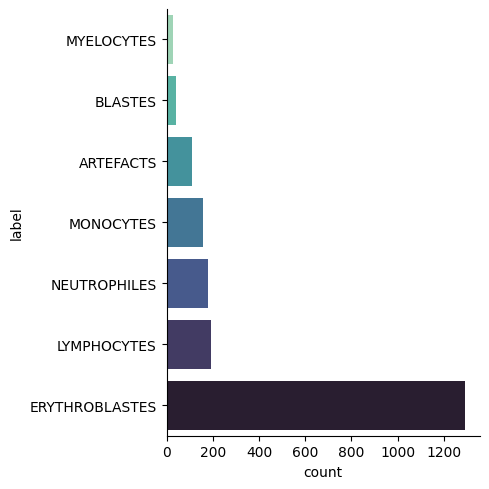

# Visualise features

We can use .describe() to visualise the behaviour of each feature.

In [ ]:
dataset.describe()

NameError: ignored

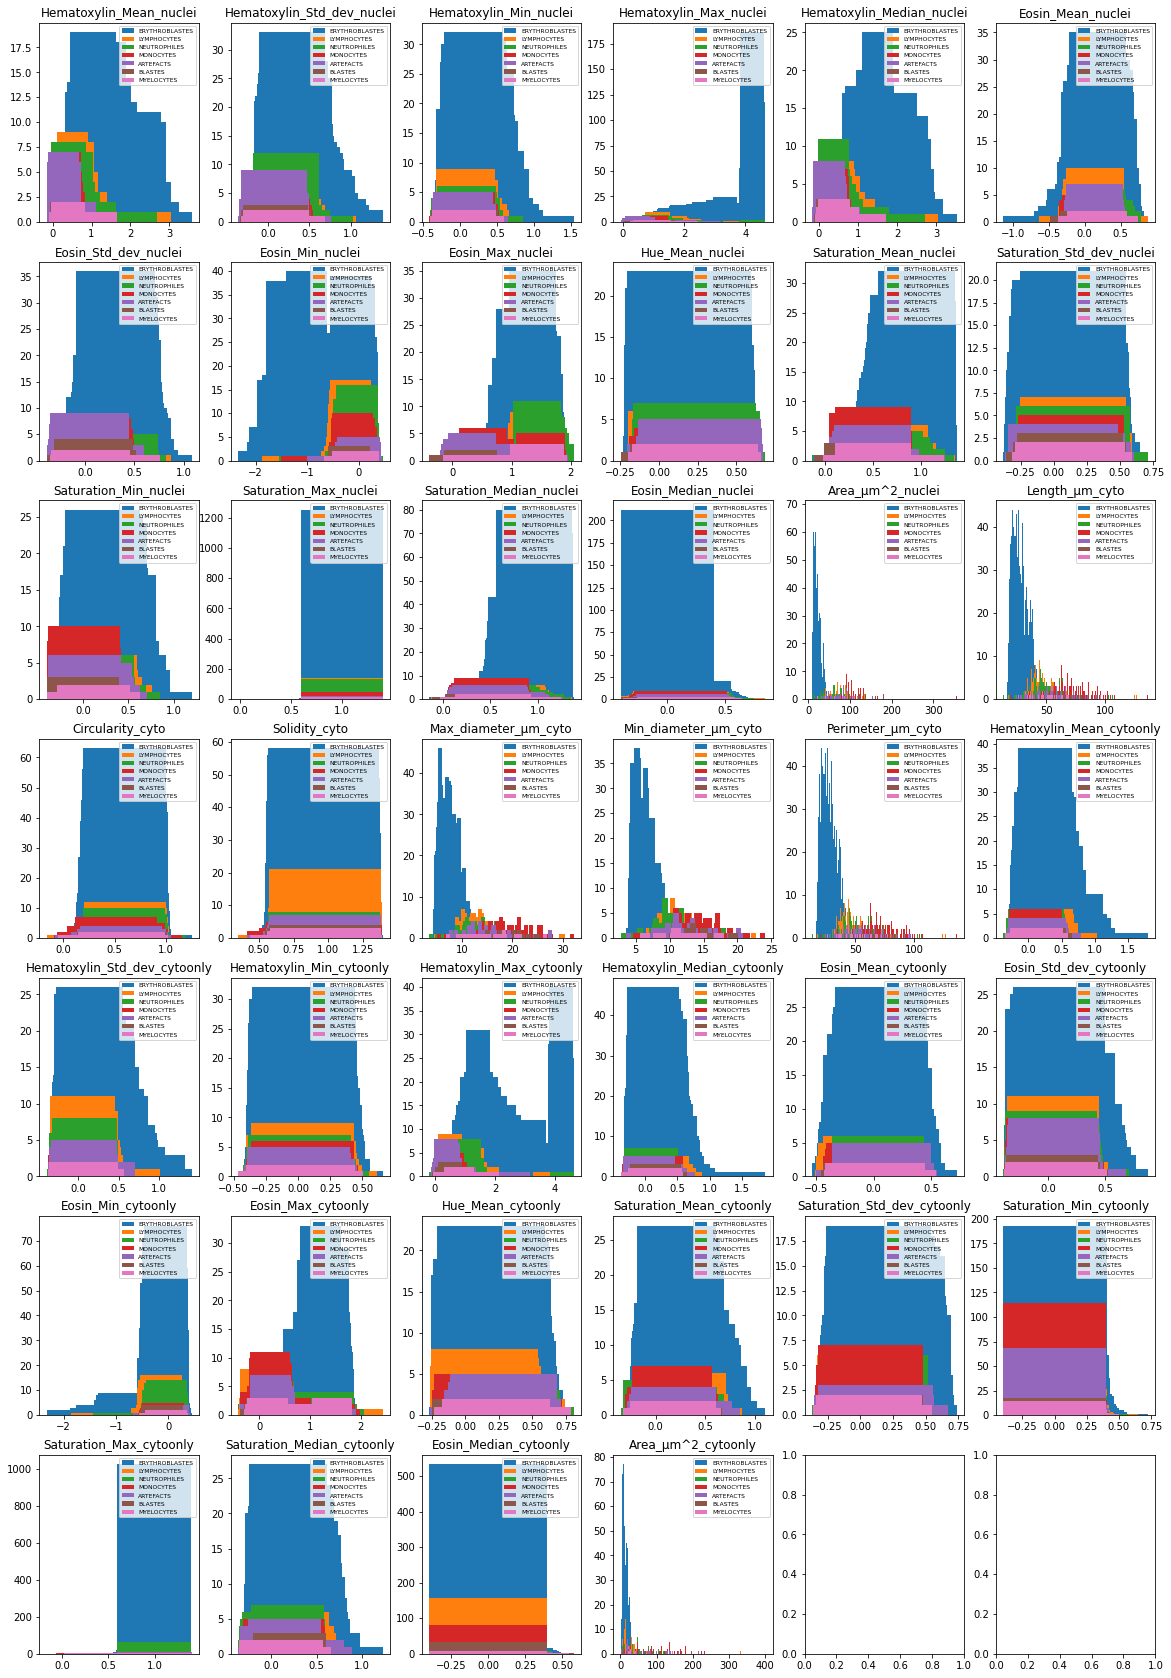

In [ ]:
rcParams['figure.figsize'] = 20, 30
fig, axes = plt.subplots(7,6)

for i, ax in enumerate(axes.flat, start=1):  
    if i < 41:
        y_max = 0
        for k in ['ERYTHROBLASTES', 'LYMPHOCYTES','NEUTROPHILES', 'MONOCYTES','ARTEFACTS',  'BLASTES', 'MYELOCYTES']:
            
            sub_df = dataset.loc[dataset.label == k]
            
            sub_df =sub_df.drop('label', axis = 1)
            a_heights, a_bins = np.histogram(np.array(sub_df[dataset.columns[i]], dtype=float), bins=200)
            if max(a_heights) + max(a_heights)*0.05 > y_max:
                y_max = max(a_heights) + max(a_heights)*0.05

            ax.bar(a_bins[:-1], a_heights, label = k)
            ax.legend(loc="upper right", prop={'size': 6})
            ax.set_ylim((0, y_max))
            ax.set_xlabel = ('Feature value')
            ax.set_ylabel = ('Number of cells')
            ax.set_title(dataset.columns[i])
            

6) The above figure represents the distribution of cells according to features. 

Which features do you think are the most discriminative for determining cell class? Explain.

7) a) Using scatter_matrix(), represent the correlation between 6 geometrical features. 

b) Do the same for 6 colour features (preferably different colour features, ex: Eosin, Hematoxylin, Hue...)

*Expected result*

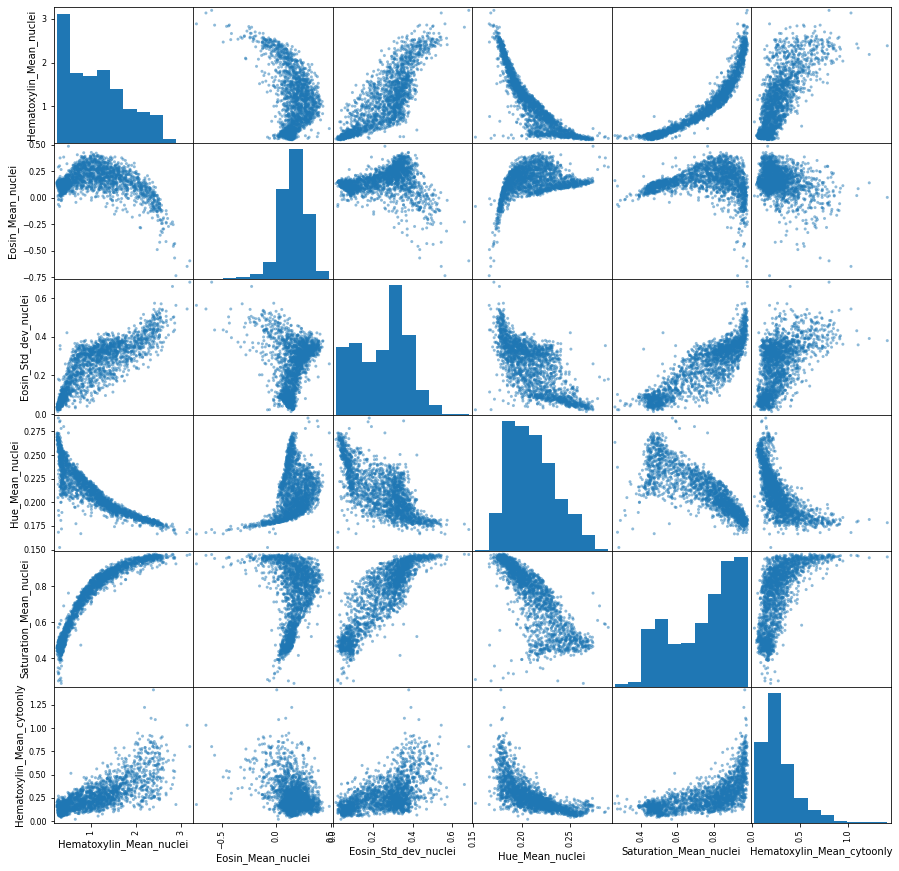


8) Represent the repartition of cells by class for two of the most discriminative features, using sns.boxplot.


*Expected result for a random selected feature*

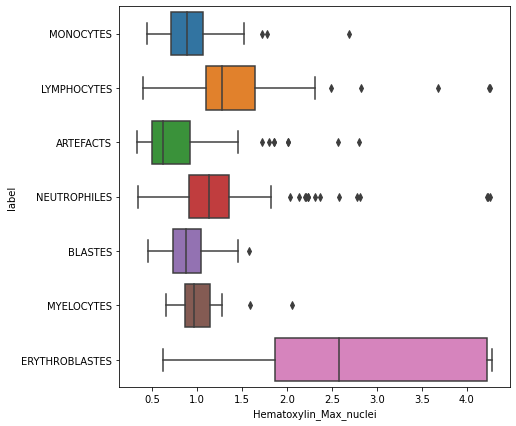

# Create X and y



In [ ]:
X = dataset.drop(['cytoID', 'label'], axis=1)
len(X)
y = dataset[['label']]
y

,label
0,MONOCYTES
1,LYMPHOCYTES
2,MONOCYTES
3,ARTEFACTS
4,NEUTROPHILES
...,...
1998,ERYTHROBLASTES
1999,ERYTHROBLASTES
2000,ERYTHROBLASTES
2001,ERYTHROBLASTES


# Splitting the dataset

*train_test_split* allows us to make the split, and makes sure the class distribution is the same in the train and the test as the initial distribution. 

We decide to keep 20% of the data for the test with *test_size*. 

*random_state* allows us to have the same random cut everytime we run the code, and thus to make the results repeatable.


In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size= 0.2, random_state=42)

Remark: train_test_split keeps the distribution of classes

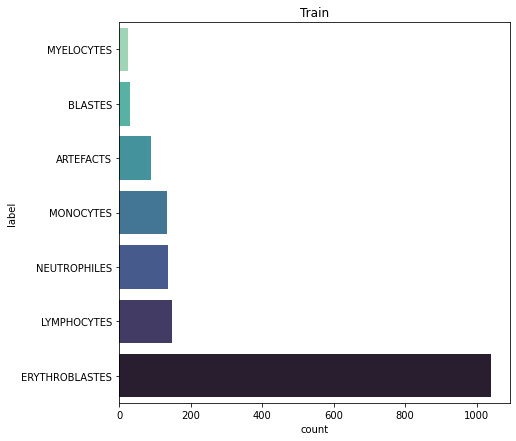

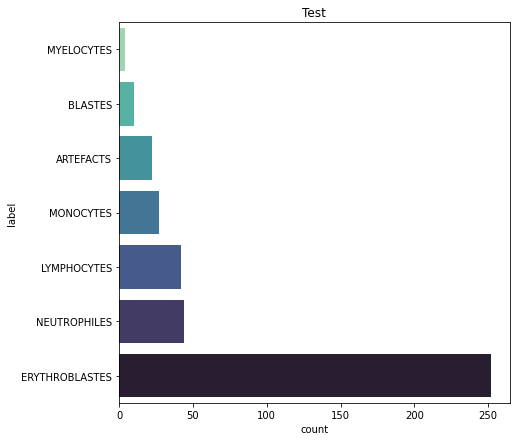

# Rescale data

9) Use *SandardScaler()* to rescale data in X_train. 

Remark: the standardscaler is trained on X_train using *fit_transform*, and then applied on X_test using *transform*.

# Training model

## SVM model

10) Train a SVM model on the training dataset. Use it to make prediction of the test dataset. 


11) Evaluate your performance using *confusion_matrix* and *classification_report*.

You can use *plot_confusion* to visualise the normalised confusion matrix.

*Expected result*

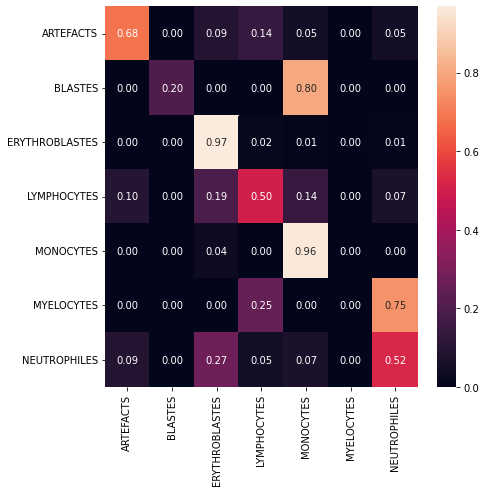

## Random Forest
13 )  Repeat 10) and 11) but with RandomForest model

# Dimensionality reduction

14) The number of features is important compared with the number of cells. Use dimensionality reduction technique such as PCA to keep only 2 principal components, and evaluate the performance of SVM and RandomForest using only these two features.

# Interpretation of the results

15) Are the results satisfying? Looking at the confusion matrix, what problem(s) are we encountering here? 

16) Are there ways to reduce these problems?

# Medical interpretation

The patient here suffers from drepanocytose. 

17) Regarding your results, can you point out two symptoms of drepanocytose? 

Help: you can look at the shape of the neutrophils with drepanocytose to guess one of the symptoms.